In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from pandas.api.types import CategoricalDtype
import glob

sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")


###### LOAD DATA ############
base_dir='/media/daniel/m2_ssd/BAG_LOCATION/CFEAR_EVAL/multi_2022-03-15_1345'
search_string="/*/*.csv"
#method_dir='oxford-cfear3-p2l_2022-02-15_1651/oxford-cfear3-p2l_2022-02-15_1651_eval.csv'
dfs = []
for filename in glob.glob(base_dir+search_string, recursive=True):
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0, skipinitialspace=True)
    dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True)
#print(df)
df = df.rename(columns={'resolution r': 'resolution r [m]'})
df['for_copy'] = df.apply (lambda row: "{:2.2f}".format(row["Trans.err.(%)"])+"/"+"{:2.2f}".format(row["Rot.err.(deg/100m)"]) , axis=1)
df['for_copy_ATE'] = df.apply (lambda row: "{:2.2f}".format(row["RPE(m)"])+"/"+"{:2.2f}".format(row["ATE(m)"]) , axis=1)
#print(df["sequence"])
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

df.head()

/media/daniel/m2_ssd/BAG_LOCATION/CFEAR_EVAL/multi_2022-03-15_1345/mulran_cfear-2_2022-03-15_1357/cfear-2_2022-03-15_1357_eval.csv


EmptyDataError: No columns to parse from file

In [59]:
## USE EITHER ## 
## MULRAN     ##
df=df[df["dataset"]=="mulran"]
cat_size_order = CategoricalDtype(
    ['KAIST01','KAIST02','KAIST03','DCC01','DCC02','DCC03','Riverside01','Riverside02','Riverside03'], 
    ordered=True
)
df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values('sequence')
##############################

In [2]:
####  OR     ####
####  OXFORD ####
df=df[df["dataset"]=="oxford"]
df['sequence'] = df.apply (lambda row: str(row["sequence"])[8:-20], axis=1)
cat_size_order = CategoricalDtype(
    ["10-12-32", "16-13-09", "17-13-26", "18-14-14", "18-15-20", "16-11-53", "10-11-46","18-14-46"], 
    ordered=True
)
df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values('sequence')
##############################


      

Sequences: 10-12-32, 16-13-09, 17-13-26, 18-14-14, 18-15-20, 16-11-53, 10-11-46, 18-14-46
cfear1: odometry error: 1.59/0.55 & 1.71/0.58 & 1.62/0.57 & 1.80/0.61 & 1.77/0.63 & 1.96/0.58 & 1.72/0.61 & 1.67/0.55
cfear1: RPE/ATE: 0.05/47.31 & 0.06/52.87 & 0.05/60.06 & 0.05/45.49 & 0.05/64.21 & 0.06/40.34 & 0.06/85.02 & 0.05/52.13


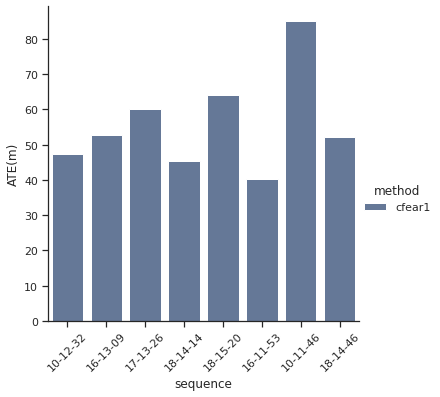

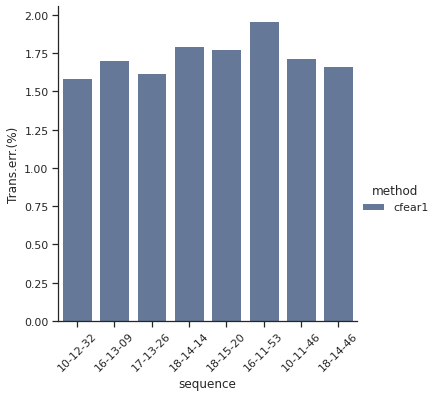

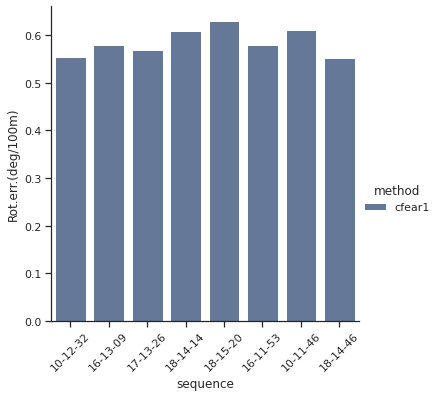

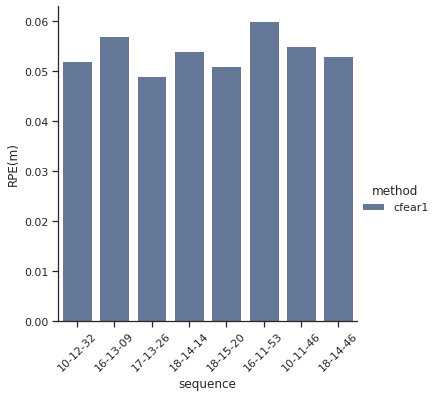

In [14]:


g = sns.catplot(x="sequence", y="ATE(m)",hue="method",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=45)

g = sns.catplot(x="sequence", y="Trans.err.(%)",hue="method",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=45)


g = sns.catplot(x="sequence", y="Rot.err.(deg/100m)",hue="method",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=45)

g = sns.catplot(x="sequence", y="RPE(m)",hue="method",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=45)

print("Sequences: " + ", ".join(df["sequence"].values))

methods=["cfear1", "cfear2", "cfear3"]
#methods=["cfear-1"]
#print(df["method"])
for method in methods:
    dfm=df[df["method"]==method]
    if(dfm.shape[0]>0):
        print(method+ ": odometry error: "+" & ".join(dfm["for_copy"].values))
        print(method+ ": RPE/ATE: " + " & ".join(dfm["for_copy_ATE"].values))
